In [4]:
import re
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import shutil

In [2]:
def change_size(img_delete_font):
    # pdb.set_trace()
    img = cv2.medianBlur(img_delete_font,5) #中值滤波，去除黑色边际中可能含有的噪声干扰
    imgray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    h ,w = imgray.shape
    img_1_h = np.ones((1, 1000)).astype(float)  # 截取中间区域height:1000
    img_w_1 = np.ones((1200, 1)).astype(float)   # 截取中间区域width:1200
    w_half = int(image.shape[1]/2-600)  # 截取中间区域width:1200——对应的left边距的坐标
    h_half = int(image.shape[0]/2-500)  # 截取中间区域height:1000——对应的top边距的坐标
    img_row_merge = np.dot(img_1_h, imgray[h_half:-h_half,:]).astype(float)  # imgray[326:-326,:]
    img_col_merge = np.dot(imgray[:, w_half:-w_half],img_w_1).astype(float)  

    ratio = ((w + h) / 2 )*2.5
    for i in range(w):
        if img_row_merge[0][i] > ratio:
            left = i
            break

    for i in range(w-1,-1,-1):
        if img_row_merge[0][i] > ratio:
            right = i
            break

    for j in range(h):
        if img_col_merge[j][0] > ratio:
            up = j
            break

    for j in range(h-1,-1,-1):
        if img_col_merge[j][0] > ratio:
            down = j
            break

    return left,right,up,down

In [24]:
read_file = r'/Users/yyy/Documents/yy/taishi_loading/load_image/原始TXT表/第二批七种病灶/id12_玻璃膜疣/279f6985d645c0f062c4343a09921e0f.jpg'
image=cv2.imread(read_file) #读取图片 image_name应该是变量
left,right,up,down = change_size(image)
print(left,right,up,down)
image_cropp = image[up:down, left:right]

0 1923 0 1555


In [10]:
target_folder_path = r'/Users/yyy/Documents/yy/taishi_loading/load_image/原始TXT表/第二批七种病灶/裁黑边/'
folder_path = r'/Users/yyy/Documents/yy/taishi_loading/load_image/原始TXT表/第二批七种病灶/id12_玻璃膜疣/'
for file in os.listdir(folder_path):
    if file.endswith('.jpg'):
        file_path = os.path.join(folder_path, file)
#         print(file_path)
        image=cv2.imread(file_path) #读取图片 image_name应该是变量
        left,right,up,down = change_size(image)
        image_cropp = image[up:down, left:right]
        cv2.imwrite(target_folder_path+file, image_cropp)

In [9]:
# cv2.imwrite(tar+file_name, image_cropp)

True

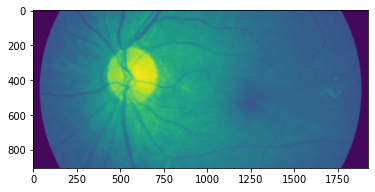

In [28]:
# imgray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# plt.imshow(imgray[326:-326,:])

In [19]:
# w_half = int(image.shape[1]/2-600)  # 截取中间区域width:1200——对应的left边距的坐标
# h_half = int(image.shape[0]/2-500)  # 截取中间区域height:1000——对应的top边距的坐标
# w_half,h

(362, 278)